In [44]:
import numpy as np
import pandas as pd
data=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
data.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


## Dataset Features Description

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

### Temporal Features

- **day**: The day of the month when the observation was recorded (1-31)
- **month**: The month when the observation was recorded (1-12)
- **year**: The year when the observation was recorded (2012)

### Weather Conditions

- **Temperature**: Air temperature measured in degrees Celsius (°C)
- **RH (Relative Humidity)**: The amount of moisture in the air as a percentage (%)
- **Ws (Wind Speed)**: The speed of wind measured in km/h
- **Rain**: The amount of rainfall measured in millimeters (mm)

### Fire Weather Index (FWI) System Components

The FWI system is used to assess fire danger by tracking moisture content in different forest fuel layers:

- **FFMC (Fine Fuel Moisture Code)**: Represents moisture content in fine fuels (litter and fine dead wood). Range: 0-101. Higher values indicate drier conditions and increased fire risk.

- **DMC (Duff Moisture Code)**: Represents moisture content in loosely compacted organic layers of moderate depth. Influenced by temperature and rainfall over several days.

- **DC (Drought Code)**: Represents moisture content in deep, compact organic layers. Reflects seasonal drought effects and takes months to respond to precipitation.

- **ISI (Initial Spread Index)**: Combines wind speed and FFMC to indicate the expected rate of fire spread. Higher values indicate faster potential fire spread.

- **BUI (Buildup Index)**: Combines DMC and DC to represent the total amount of fuel available for combustion. Higher values indicate more fuel available.


### Target Variable

- **FWI (Fire Weather Index)**: The overall fire intensity index that combines ISI and BUI. It provides a numerical rating of fire intensity and is the most comprehensive indicator of fire danger. 

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [46]:
data.drop('Classes', axis=1, inplace=True)

In [47]:
print(data.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64


In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

### Correlation Analysis

Correlation measures the strength and direction of the linear relationship between two variables. It helps us understand how features are related to each other and to the target variable (Classes).

#### Understanding Correlation

- **Positive Correlation (+1)**: When one variable increases, the other also increases
- **Negative Correlation (-1)**: When one variable increases, the other decreases
- **No Correlation (0)**: No linear relationship between variables

#### Correlation Coefficient Range

- **0.7 to 1.0** or **-0.7 to -1.0**: Strong correlation
- **0.3 to 0.7** or **-0.3 to -0.7**: Moderate correlation
- **0.0 to 0.3** or **0.0 to -0.3**: Weak correlation

#### Pearson Correlation Formula

The Pearson correlation coefficient (r) is calculated as:

$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Where:
- $x_i$ and $y_i$ are individual data points
- $\bar{x}$ and $\bar{y}$ are the mean values of variables x and y
- $n$ is the number of observations

#### Key Insights from the Heatmap

- **High positive correlation**: Variables that move together (e.g., DMC and BUI: 0.98)
- **High negative correlation**: Variables that move in opposite directions (e.g., Temperature and RH: -0.66)
- **Multicollinearity**: When features are highly correlated with each other, which may affect model performance

In [50]:
df = data.drop(['day','month','year','Region'], axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


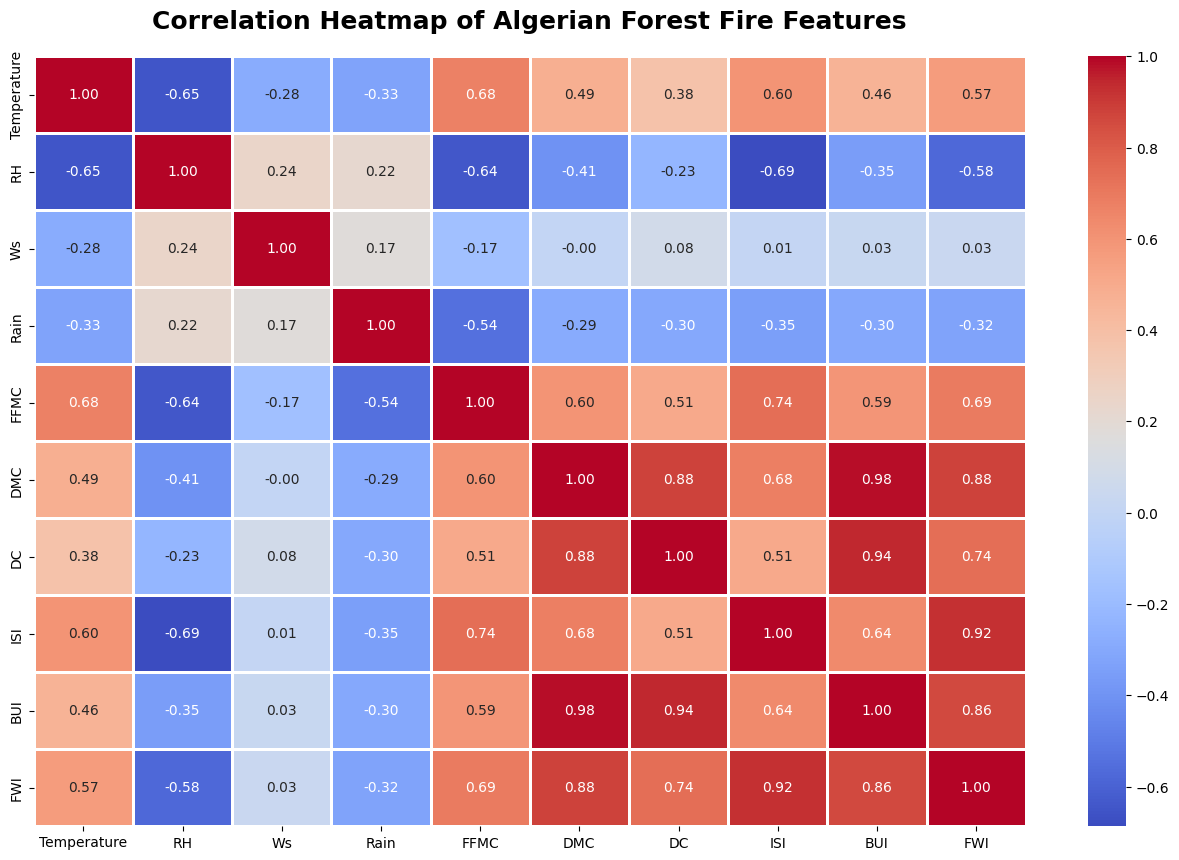

In [51]:
plt.figure(figsize=(16, 10))
correlation_matrix = df.corr()


sns.heatmap(
    correlation_matrix, 
    annot=True,           
    fmt='.2f',           
    cmap='coolwarm',      
    linewidths=1,         
    linecolor='white'     
)

plt.title('Correlation Heatmap of Algerian Forest Fire Features', fontsize=18, fontweight='bold', pad=20)
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


In [52]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [53]:
outlier_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier_mask.sum()

Temperature     2
RH              0
Ws              8
Rain           35
FFMC           13
DMC            12
DC             14
ISI             4
BUI            11
FWI             4
dtype: int64

In [54]:
df.skew()

Temperature   -0.191327
RH            -0.242790
Ws             0.555586
Rain           4.568630
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
dtype: float64

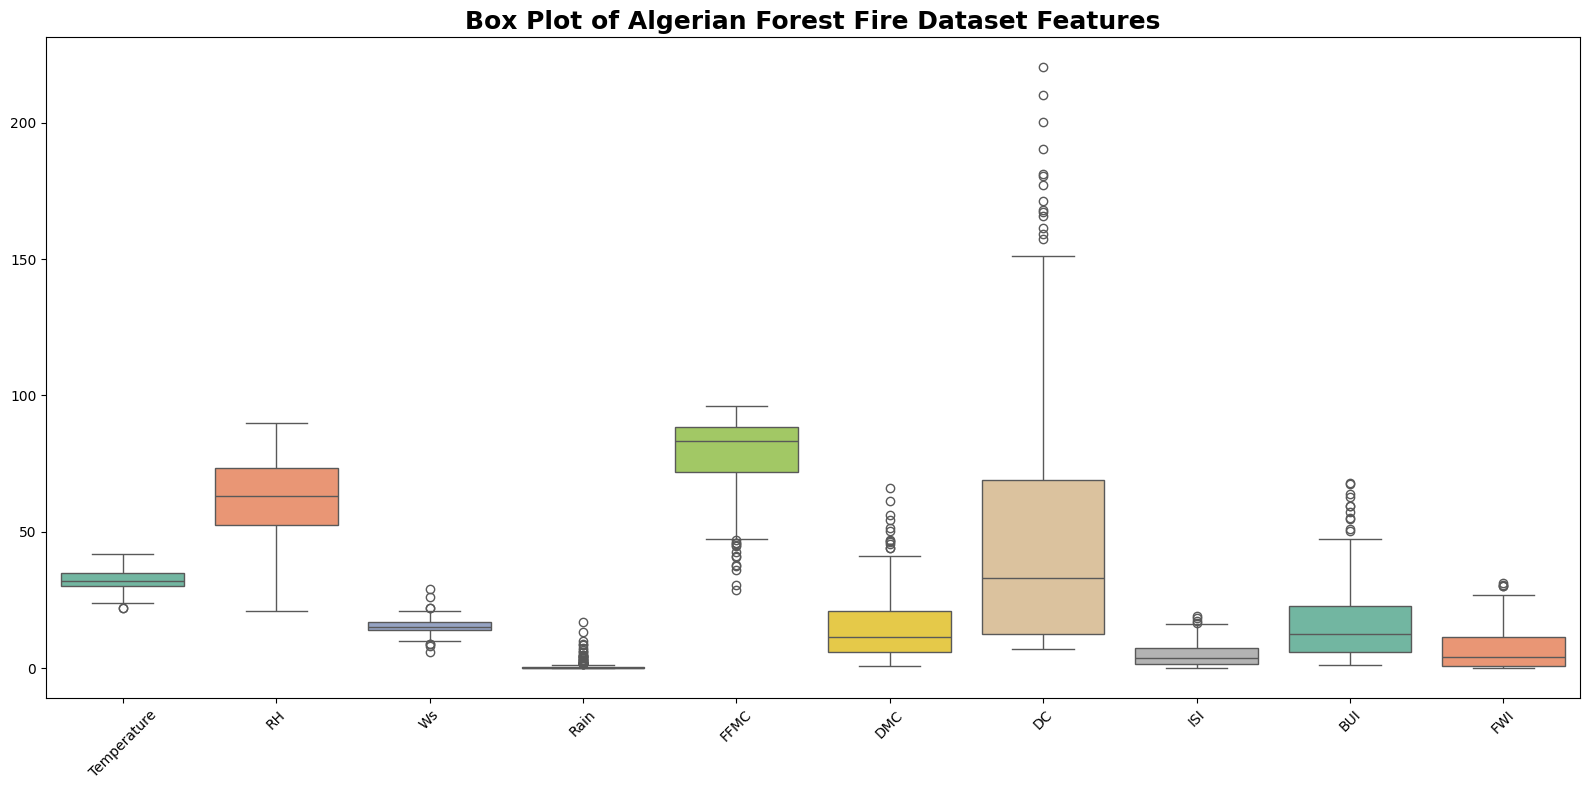

In [55]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=df, palette='Set2')

plt.title('Box Plot of Algerian Forest Fire Dataset Features', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("boxplot_features.png", dpi=300, bbox_inches='tight') 
plt.show()


### Distribution Analysis with Histograms

Histograms are a fundamental visualization tool that help us understand the distribution and characteristics of numerical data. They provide insights into the shape, central tendency, and spread of each feature in our dataset.

#### What is a Histogram?

A histogram divides the range of values into bins (intervals) and displays the frequency of observations falling into each bin as bars. The height of each bar represents how many data points fall within that range.

#### Key Components

- **Bins**: The intervals that divide the data range
- **Frequency**: The count of observations in each bin (bar height)
- **KDE (Kernel Density Estimate)**: The smooth curve overlaying the histogram that shows the probability density

#### What to Look For in Histograms

1. **Shape of Distribution**
    - **Normal (Bell-shaped)**: Data is symmetrically distributed around the mean
    - **Skewed Right**: Long tail on the right side, most values concentrated on the left
    - **Skewed Left**: Long tail on the left side, most values concentrated on the right
    - **Bimodal**: Two distinct peaks, suggesting two different groups in the data

2. **Central Tendency**
    - Where most of the data is concentrated
    - Indicated by the highest bars in the histogram

3. **Spread (Variability)**
    - Wide distribution: High variability in the data
    - Narrow distribution: Low variability, values are similar

4. **Outliers**
    - Isolated bars far from the main distribution
    - May indicate unusual observations or data quality issues

#### Why Distribution Analysis Matters

- **Feature Understanding**: Helps identify the nature and behavior of each variable
- **Data Quality**: Reveals outliers, missing patterns, or data entry errors
- **Model Selection**: Different distributions may require different modeling approaches
- **Feature Engineering**: Skewed distributions might benefit from transformations (log, square root, etc.)
- **Normality Assumptions**: Some statistical methods assume normally distributed data

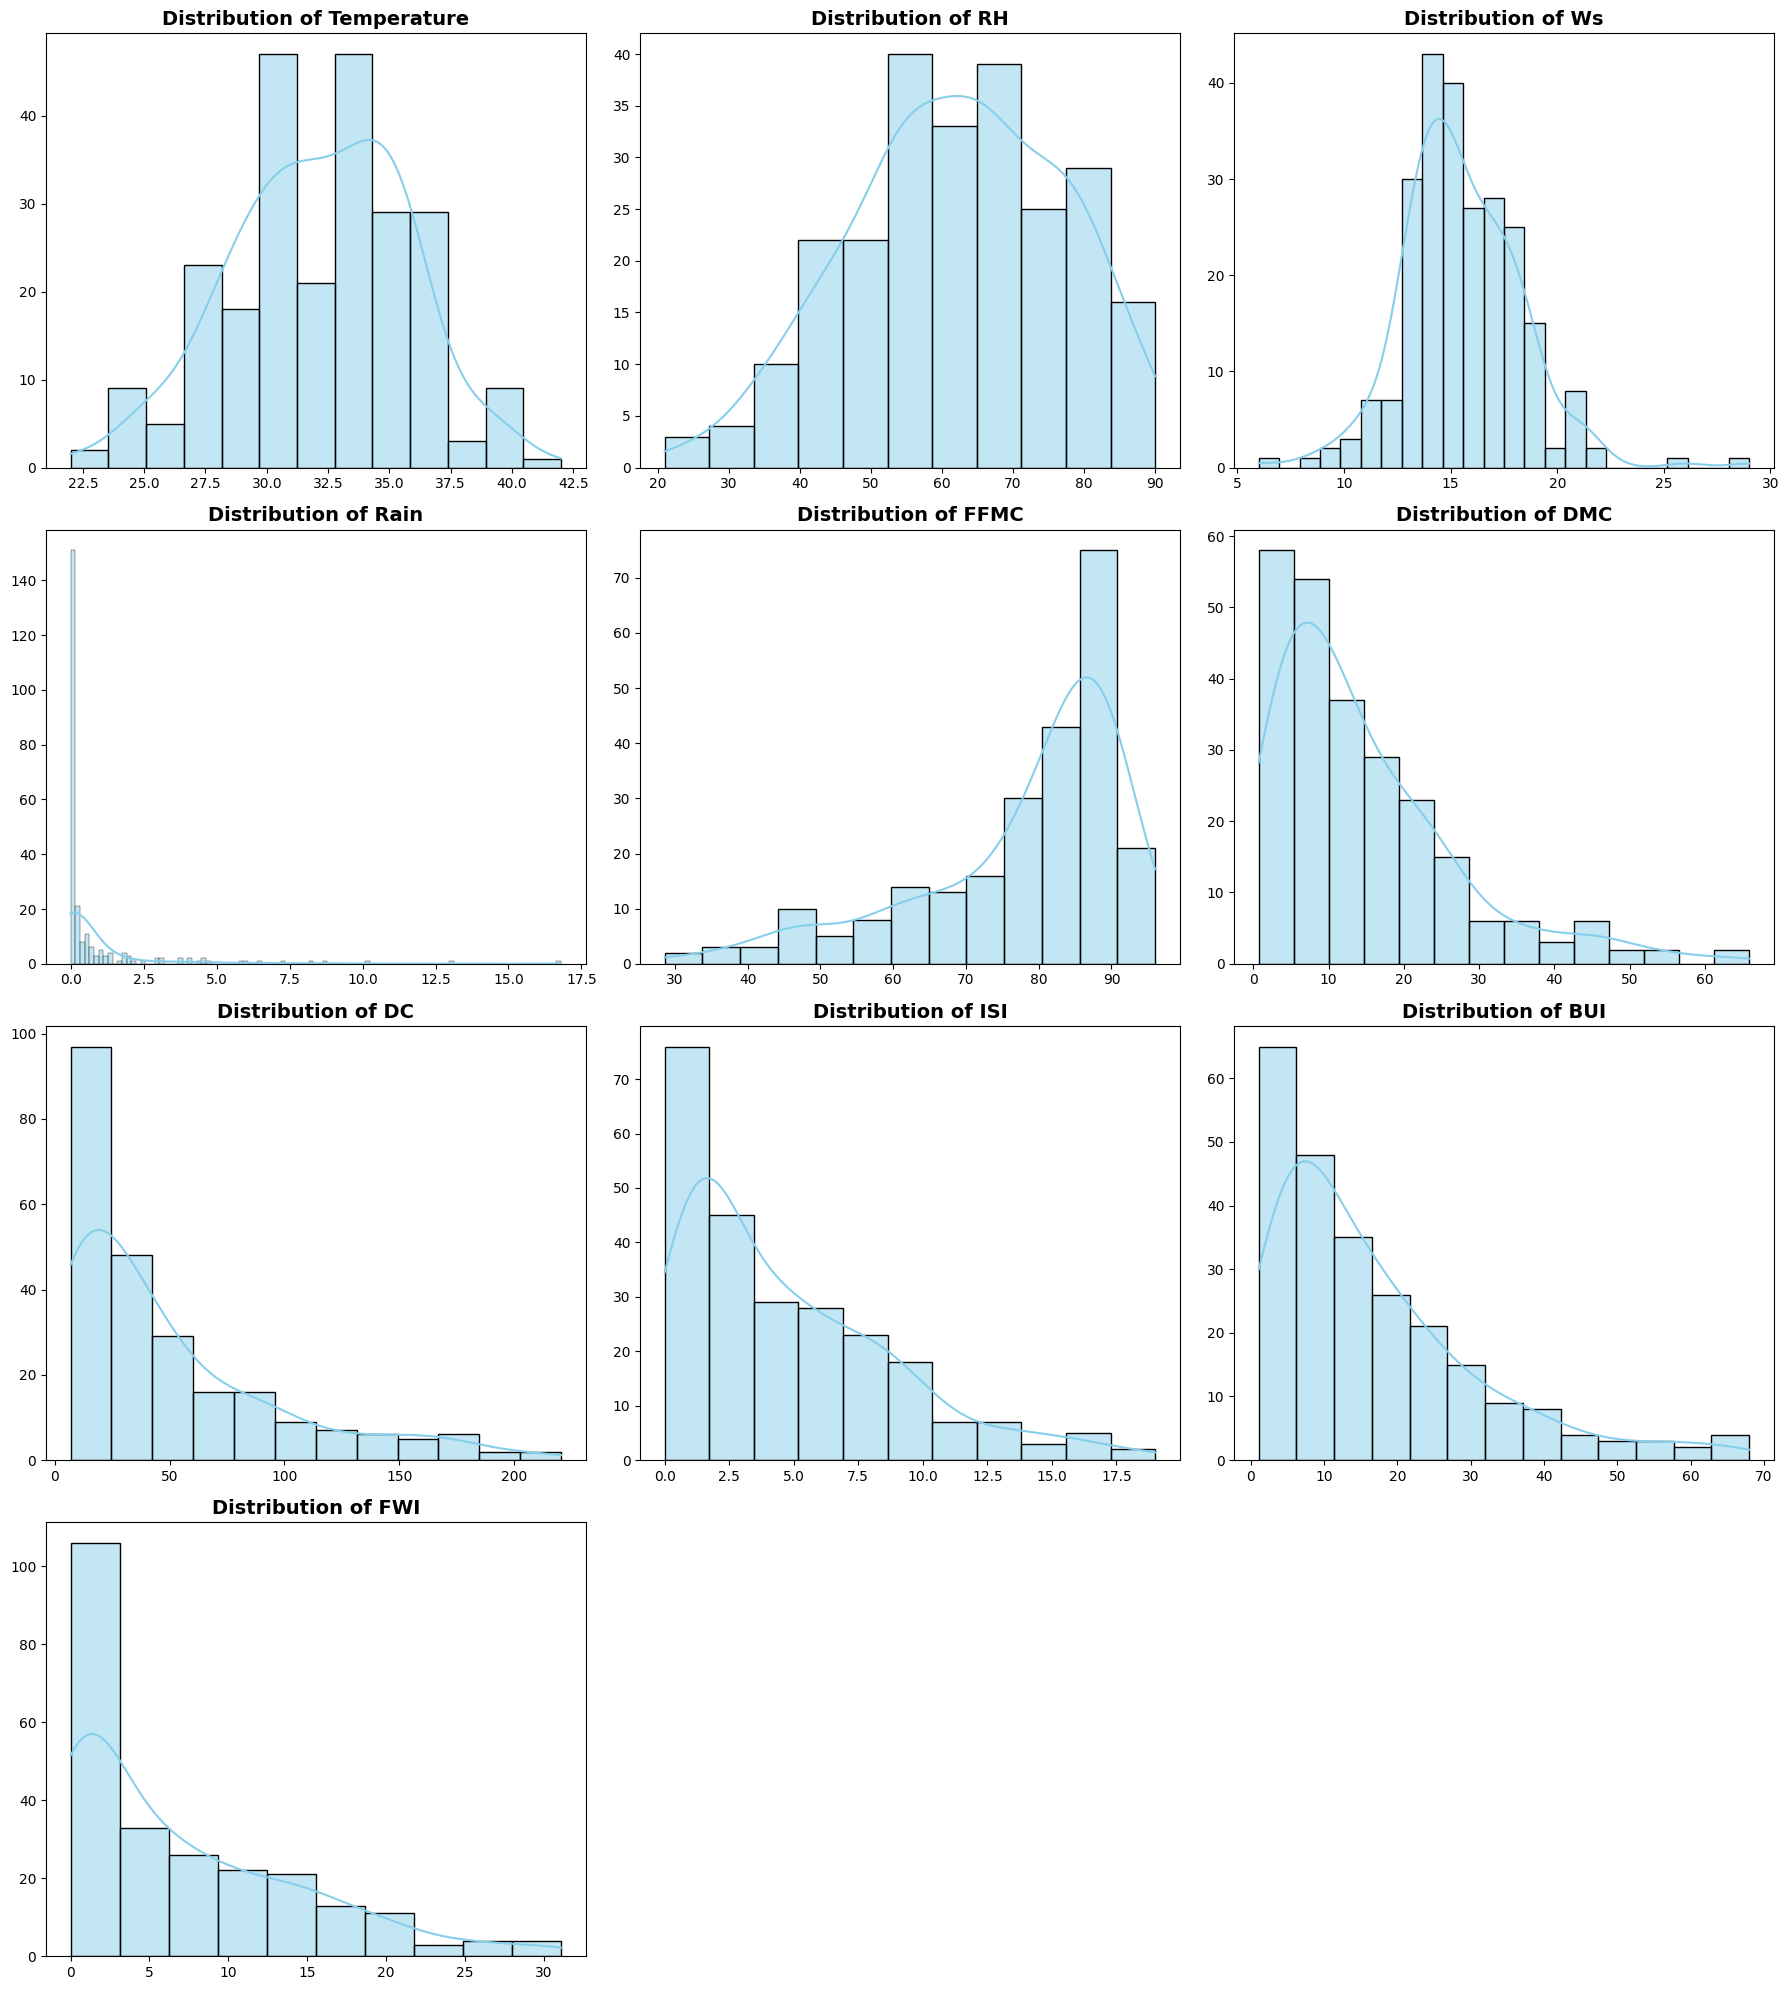

In [56]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()


for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.savefig("distribution_plot.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

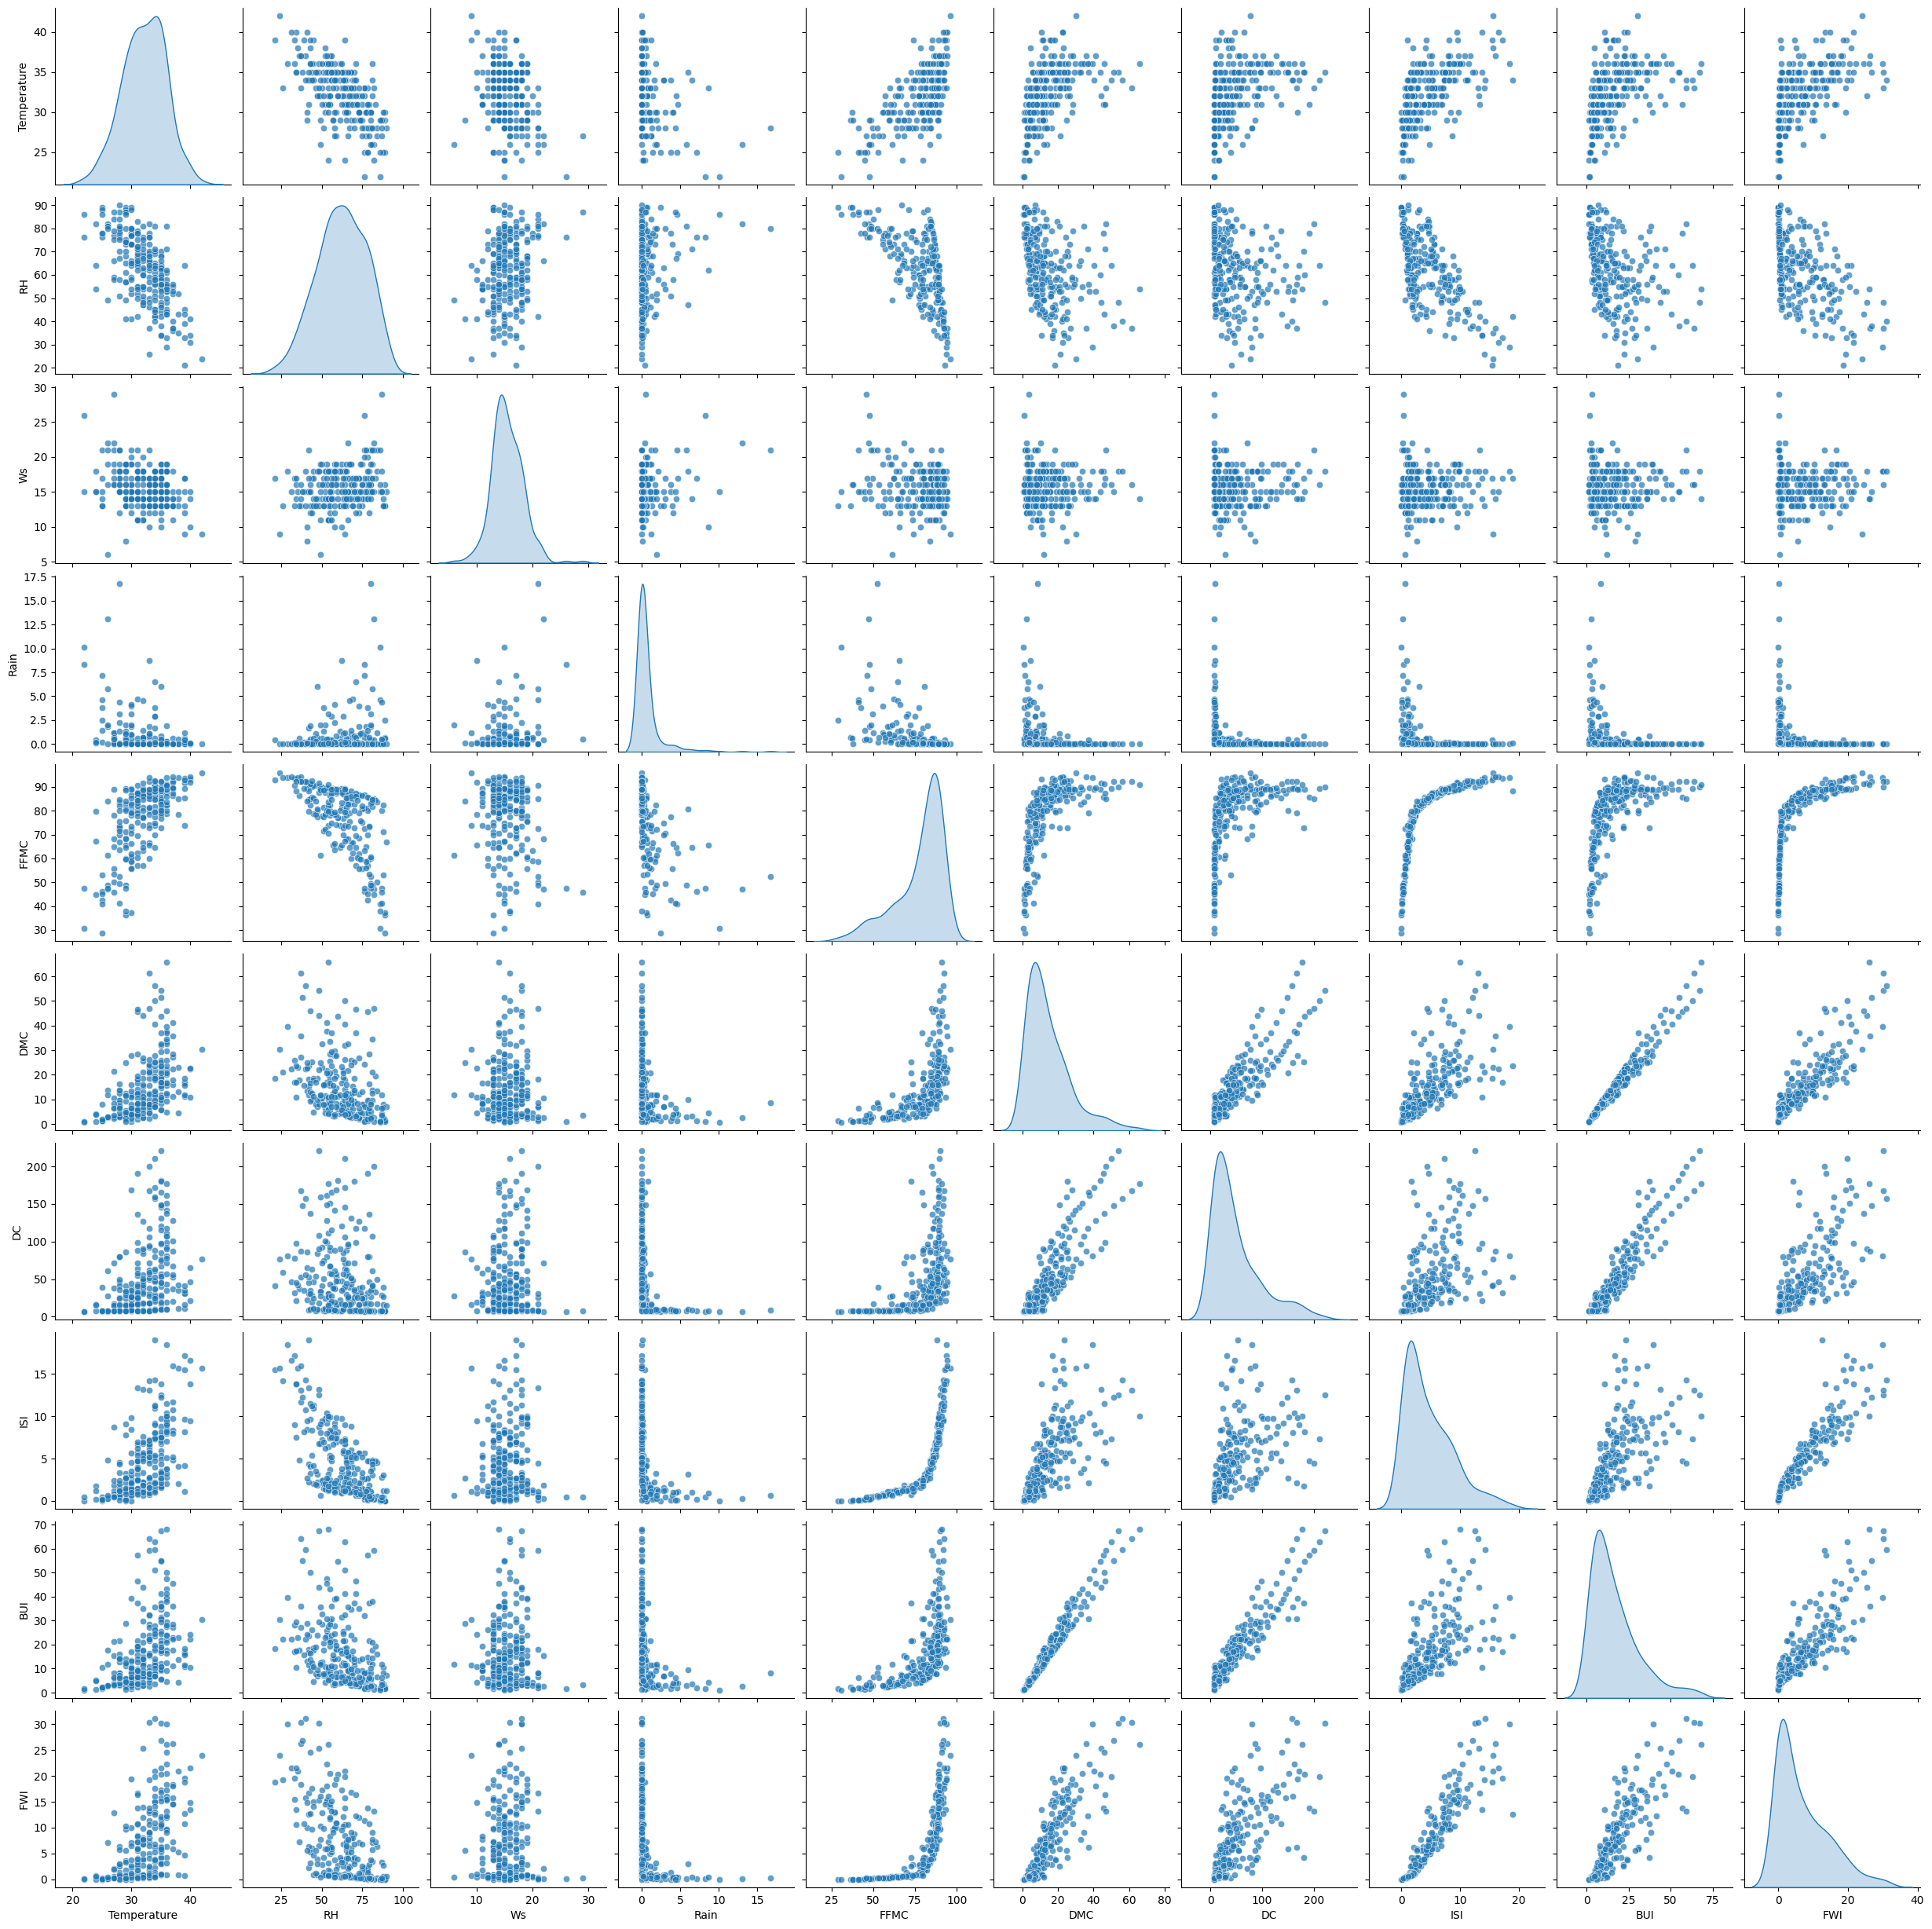

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.7})
plt.savefig("pairplot.png", dpi=300, bbox_inches='tight')
plt.show()